Целью данной работы является исследование и применение методов машинного обучения в задачах обработки текста на естественных языках с использованием набора данных, содержащего текстовые данные на естественном языке, а конкретно – распознавание признаков депрессии в сообщениях пользователей. Основные этапы работы включают в себя предварительный анализ данных, подготовку текстовых данных для обучения моделей, построение и сравнение различных алгоритмов машинного обучения, а также оптимизацию параметров моделей для достижения наилучших результатов.

# **Выбор набора данных**

[Оригинальный датасет](https://docs.google.com/spreadsheets/d/1M9eTZ2PsQzhAPQDc4prfIUhy-W55GKP7/edit?usp=sharing&ouid=114448946689631132072&rtpof=true&sd=true)
был собран врачом-психиатром Даниловым Владиславом Олеговичем, а также другими врачами-психиатрами [ЦМЗ «Эмпатия»](https://empathycenter.ru). Эти же лица составляют круг авторов датасета.

Датасет был анонимизирован авторами датасета (лишён каких-либо индивидуальных признаков, по которым можно было установить личность определенного человека) в соответствии со ст. 13 Федерального закона от 21.11.2011 N 323-ФЗ (ред. от 25.12.2023) "Об основах охраны здоровья граждан в Российской Федерации" (с изм. и доп., вступ. в силу с 01.04.2024).


# **Предварительный анализ данных**

Оригинальный датасет содержит в себе таблицу с двумя колонками, первую из которых составляют «Высказывания» пациентов, вторую колонку – установленный врачом-психиатром диагноз на основании высказывания («Диагноз»)

In [ ]:
import numpy as np
import pandas as pd

original_df = pd.read_excel('https://uc4b0dabe74c4f660504122b6c49.dl.dropboxusercontent.com/cd/0/get/CSjVmyRppFr33bmYNvO9kN9US0mNwBw0V6rQp37ML6AbgjQ0A5QH2ialTp9vZdfHEZeC43ouBxxGYFpDqwY6ykag8uAwK3ui5G2ugqwizSOxVF663rZXsytzdE-vehlr1LLqqNkg8hpBJXNI7hXwC8qca6K9IriH1gZWtfejWc97zA/file#')
original_df

,Высказывания,Диагноз
0,Последние 2 недели как-будто в голове оркестр ...,Агорафобия с паническим расстройством
1,"Сегодня записалась на окрашивание, хочу постри...",Агорафобия с паническим расстройством
2,"Когда к вам обращался, было очень плохо. Начал...","БАР 2 типа, ремиссия."
3,"Не знаю куда бежать и что делать, потому что т...","БАР, гипомания"
4,"Я уже не помню, когда спал последний раз норма...","БАР, гипомания"
...,...,...
77,"В новостях, наверное, видели, как беспилотник ...",Циклотимия
78,Когда начинается весна - это мой персональный ...,Циклотимия
79,"Мне сказали, что можно попробовать убрать лека...",Шизоидное расстройство личности
80,"С марта начала голова болеть, вызывали скорую,...",Эмоционально неустойчивое расстройство личност...


Исходя из цели данной курсовой работы, а именно – распознавания признаков депрессии исходя из текста, нам подойдут следующие диагнозы из таблицы (согласно установленным [критериям](https://psychiatr.ru/download/1998?view=1&name=%D0%9C%D0%9A%D0%91-10_%D1%81_%D0%B3%D0%B8%D0%BF%D0%B5%D1%80%D1%81%D1%81%D1%8B%D0%BB%D0%BA%D0%B0%D0%BC%D0%B8.pdf#page=118) из [МКБ-10, принятой в РФ](https://normativ.kontur.ru/document?moduleId=1&documentId=73815)):


*   Биполярное аффективное расстройство (БАР), депрессивный эпизод средней степени тяжести
* БАР, депрессия
* БАР, начало депрессии
* Депрессивный эпизод лёгкой степени тяжести
* Депрессивный эпизод средней степени тяжести
* Депрессивный эпизод тяжёлой степени без психотических симптомов
* Депрессивный эпизод тяжёлой степени с психотическими симптомами
* [Дистимия](https://psychiatr.ru/download/1998?view=1&name=%D0%9C%D0%9A%D0%91-10_%D1%81_%D0%B3%D0%B8%D0%BF%D0%B5%D1%80%D1%81%D1%81%D1%8B%D0%BB%D0%BA%D0%B0%D0%BC%D0%B8.pdf#page=136)
* Рекуррентное депрессивное расстройство (РДР), текущий эпизод средней степени тяжести

# **Очистка и нормализация данных**

Прежде, чем мы перейдём к обучению нейронных сетей (алгоритмов машинного обучения), необходимо очистить и нормализовать данные первого и второго столбцов.

В рамках обработки текстов на естественных языках (NLP) очистка данных состоит из следующих этапов:

* Удаление синтаксических знаков
* Удаление стоп-слов (предлогов и прочих "мусорных" слов, не вносящих дополнительной информации в текст)
* Приведение регистра слов в строчный вид
* Приведение слов в [нормальную форму (лемматизация)](https://ru.wikipedia.org/wiki/%D0%9B%D0%B5%D0%BC%D0%BC%D0%B0_(%D0%BB%D0%B8%D0%BD%D0%B3%D0%B2%D0%B8%D1%81%D1%82%D0%B8%D0%BA%D0%B0))

Исходя из предпосылки, что данная работа предполагает в себе задачу бинарной классификации (депрессивные признаки определены/не определены), то вышеупомянутые диагнозы (депрессивные эпизоды и т.п. депрессивные аффективные расстройства и/или симптоматика) можно упростить до значений TRUE/FALSE, то есть, содержит ли в себе предложение депрессивные признаки.

In [ ]:
df = pd.read_csv('https://uc9eb57d47b06018518ddac6da6a.dl.dropboxusercontent.com/cd/0/get/CSgV-WEEmxajQ6J46F0sgKqzqBNhmGk8FOXR2w44Zo-c3N-00Je0unG91RQ7E-s7vbrGhPeoP2sSnsnT31UL2c3PqIjAYwAIsIyiVHHAkHp2IxdabKI2jbCPSjBhk0RIB-Fer9YdDqXwZdhpKyrTux9HB2Tdw0itzn1Imc56BO-EzA/file#')
df

,speech,is_depression
0,обращался очень плохо начал принимать ламотрид...,True
1,знаю бежать делать плохо мыслях будущем голова...,True
2,встаю кровати вечеру становится хожу ночью ули...,True
3,5 месяцев вообще интересно кроме моей дочерью ...,True
4,сначала сама говорила никчёмная позорница вооб...,True
5,чувствую другим могу взять руки чтото внутри н...,True
6,сон стал моим главным состоянием бодровствоват...,True
7,плохо очень плохо физически лежу прибили крова...,True
8,раньше знала буду думать смерти каждый день хо...,True
9,думала депрессия это вообще последнее время пл...,True


Теперь посмотрим на подготовленный датасет с депрессивными признаками...

In [ ]:
df[df['is_depression'] == True]

,speech,is_depression
0,обращался очень плохо начал принимать ламотрид...,True
1,знаю бежать делать плохо мыслях будущем голова...,True
2,встаю кровати вечеру становится хожу ночью ули...,True
3,5 месяцев вообще интересно кроме моей дочерью ...,True
4,сначала сама говорила никчёмная позорница вооб...,True
5,чувствую другим могу взять руки чтото внутри н...,True
6,сон стал моим главным состоянием бодровствоват...,True
7,плохо очень плохо физически лежу прибили крова...,True
8,раньше знала буду думать смерти каждый день хо...,True
9,думала депрессия это вообще последнее время пл...,True


...и с отобранными не-депрессивнымии признаками...

In [ ]:
df[df['is_depression'] == False]

,speech,is_depression
19,последние 2 недели какбудто голове оркестр мыс...,False
20,сегодня записалась окрашивание хочу постричься...,False
21,помню спал последний нормально вообще засыпал ...,False
22,антидепрессантах быстро както стало нормально ...,False
23,знаю деть делать хочется отключиться эта трево...,False
24,одну неделю чувствую интерес чему например куп...,False
25,очень остро жизнь всё реагирую очень эмоционал...,False
26,внутри натянутая струна которая порвётся всё п...,False
27,столько переделала это лучшее время моей жизни...,False
28,"несколько недель назад подумала ""если ответят ...",False


Как можно заметить из таблицы с фильтром по депрессивным признакам, все жалобы пациентов так или иначе содержат слово "плохо".


Докажем это при помощи диаграмм.

<BarContainer object of 29 artists>

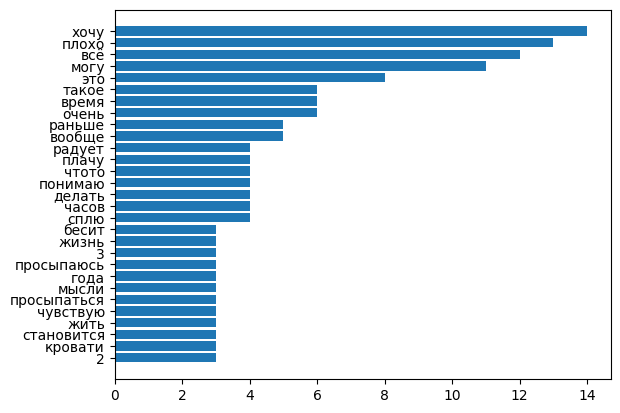

In [ ]:
import matplotlib.pyplot as plt

from collections import Counter

depression_df = df[df['is_depression'] == True]
depression_df_speech = depression_df.speech.values
depression_df_speech = " ".join(depression_df_speech).split(' ')

countered_depression_df = dict(Counter(depression_df_speech))
ordered_cddf = dict(sorted(countered_depression_df.items(), key=lambda item: item[1]))
ordered_cddf_filtered = dict()
for k, v in ordered_cddf.items():
  if v > 2:
    ordered_cddf_filtered[k] = v # фильтруем мусорные слова, то есть те, которые встречаются меньше двух раз

ordered_cddf_filtered_words = list(ordered_cddf_filtered.keys())
ordered_cddf_filtered_quantity = list(ordered_cddf_filtered.values())
plt.barh(ordered_cddf_filtered_words, ordered_cddf_filtered_quantity)

Многовато "плохо"-слов и связанных с ними словосочетаний.

Очевидно, что в не-депрессивной части таблицы такого обилия "плохо"-слов не существует, да и тон предложений явно не пессиместический.

Теперь осталось выбрать алгоритм машинного обучения.

Для этого, нужно опеределить класс задач, которые мы будем решать. В нашем случае эта задача -- задача классификации.

Список алгоритмов машинного обучения, которые мы будем пробовать согласно [схеме](https://algorit.ma/wp-content/uploads/2018/10/scikitlearn-algorithm-cheatsheet.png):

* Классификатор стохастического градиентного спуска (SGD)
* Градиентный бустинг
* Линейный метод опорных векторов
* Аппроксимация ядра
* Метод K-соседей (KNeighbours)
* Наивный Байес (различные его вариации)
* Метод опорных векторов

Но, для начала, необходимо выбрать векторизатор для наших данных, исходя из вышеупомянутой диаграммы частоты встречаемости слов.

Для наших целей лучше всего подойдёт векторизатор TF-IDF, что векторизует текст, исходя из встречаемости слова в мешке слов.

Разделим таблицу на две части -- высказывания и диагнозы.

In [ ]:
speech = df.speech.values
diagnosis = df.is_depression.values.astype(int)

Разделим датасет на две части -- тренировочную и тестовую части:

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(speech, diagnosis, test_size=0.26)

Теперь импортируем вышеупомянутые алгоритмы машинного обучения:

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import SGDClassifier
from sklearn.svm import LinearSVC, SVC
from sklearn.kernel_approximation import Nystroem
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import MultinomialNB, BernoulliNB, GaussianNB

from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import accuracy_score

Построим пайплайны (цепочки действий) для алгоритмов МО:

In [ ]:
sgd_pipeline = Pipeline([
    ('tfidf', TfidfVectorizer()),
    ('clf', SGDClassifier())
])

In [ ]:
gradient_boosting_pipeline = Pipeline([
    ('tfidf', TfidfVectorizer()),
    ('clf', GradientBoostingClassifier(n_estimators=100, random_state=42))
])

In [ ]:
linear_svc_pipeline = Pipeline([
    ('tfidf', TfidfVectorizer()),
    ('clf', LinearSVC())
])

In [ ]:
kernel_approximation_pipeline = Pipeline([
    ('tfidf', TfidfVectorizer()),
    ('kernel_approx', Nystroem()),
    ('clf', SGDClassifier())
])

In [ ]:
knn_pipeline = Pipeline([
    ('tfidf', TfidfVectorizer()),
    ('clf', KNeighborsClassifier())
])

In [ ]:
naive_bayes_pipeline = Pipeline([
    ('tfidf', TfidfVectorizer()),
    ('clf', MultinomialNB())
])

In [ ]:
svc_pipeline = Pipeline([
    ('tfidf', TfidfVectorizer()),
    ('clf', SVC())
])

Теперь соберём алгоритмы в список:

In [ ]:
pipelines = [naive_bayes_pipeline, sgd_pipeline, linear_svc_pipeline, svc_pipeline, gradient_boosting_pipeline, knn_pipeline, kernel_approximation_pipeline]

In [ ]:
pipelines = {
    'Наивный Байес': naive_bayes_pipeline,
    'Стохастический линейный спуск': sgd_pipeline,
    'Линейный метод опорных векторов': linear_svc_pipeline,
    'Метод опорных векторов': svc_pipeline,
    'Градиентный бустинг': gradient_boosting_pipeline,
    'Метод К-случайных соседей': knn_pipeline,
    'Аппроксимация ядра': kernel_approximation_pipeline
}

И начнём мерять точность...

In [ ]:
import time

for pipeline_name, pipeline in pipelines.items():
  start_time = time.time()
  pipeline.fit(X_train, y_train)
  y_pred = pipeline.predict(X_test)
  print(f"Accuracy of {pipeline_name}: {accuracy_score(y_test, y_pred)}")
  print("Алгоритм обучался --- %s секунд ---" % (time.time() - start_time))

Accuracy of Наивный Байес: 0.7
Алгоритм обучался --- 0.03062891960144043 секунд ---
Accuracy of Стохастический линейный спуск: 0.7
Алгоритм обучался --- 0.011686563491821289 секунд ---
Accuracy of Линейный метод опорных векторов: 0.7
Алгоритм обучался --- 0.010412216186523438 секунд ---
Accuracy of Метод опорных векторов: 0.7
Алгоритм обучался --- 0.013239860534667969 секунд ---
Accuracy of Градиентный бустинг: 0.8
Алгоритм обучался --- 0.2236926555633545 секунд ---
Accuracy of Метод К-случайных соседей: 0.6
Алгоритм обучался --- 0.0919797420501709 секунд ---
Accuracy of Аппроксимация ядра: 0.7
Алгоритм обучался --- 0.035115957260131836 секунд ---


/usr/local/lib/python3.10/dist-packages/sklearn/kernel_approximation.py:1001: UserWarning: n_components > n_samples. This is not possible.
n_components was set to n_samples, which results in inefficient evaluation of the full kernel.
  warnings.warn(


Как видно, наибольную точности имеют алгоритм градиентного бустинга и линейного метода опорных векторов.

Протестируем эти алгоритмы при помощи [жалобы](https://youtu.be/-FgfVbihMeg):

> Плохо мне, не могу работать, не могу читать, всё плохо, мне трудно думать.




In [ ]:
depression_quote = ["Плохо мне, не могу работать, не могу читать, всё плохо, мне трудно думать."]

Также включим выдуманное высказывание вылечившегося от депрессии:

> Ушла моя тоска, мне сейчас так хорошо, сейчас всё улучшилось.


In [ ]:
non_depression_quote = ["Ушла моя тоска, мне сейчас так хорошо, сейчас всё улучшилось."]

In [ ]:
for pipeline_name, pipeline in pipelines.items():
  predict = pipeline.predict(depression_quote)
  predict_value = False
  if predict[0] == 1:
    predict_value = True
  print(f"{pipeline_name}: {predict_value}")

Наивный Байес: True
Стохастический линейный спуск: True
Линейный метод опорных векторов: True
Метод опорных векторов: True
Градиентный бустинг: True
Метод К-случайных соседей: True
Аппроксимация ядра: True


In [ ]:
for pipeline_name, pipeline in pipelines.items():
  predict = pipeline.predict(non_depression_quote)
  predict_value = False
  if predict[0] == 1:
    predict_value = True
  print(f"{pipeline_name}: {predict_value}")

Наивный Байес: True
Стохастический линейный спуск: True
Линейный метод опорных векторов: True
Метод опорных векторов: True
Градиентный бустинг: False
Метод К-случайных соседей: False
Аппроксимация ядра: True


Как видно из тестирования алгоритм, наиболее точно предсказывают депрессивные признаки метод градиентного бустинга, а также метод К-случайных соседей.

# Проблемы

Проблема точности лежит в малом количестве данных (меньше 100 строк), однако, данные алгоритмы МО всё же смогли предсказать депрессивные признаки в достаточно туманном предложении.

Также проблема лежит в том, что психиатрия -- наука, которая (в основном) опирается на высказываниях пациентов, то есть, [научный метод применительно к психиатрии применим только лишь относительно, нежели полностью](https://ncpz.ru/lib/1/book/39/chapter/6).

> Проблема методологически-эпистемологической характеристики психиатрии сводится в принципе к определению ее отношения к естественным и гуманитарным наукам. В практике это проявляется постоянным вопросом, мучающим психиатров: в какой степени специфика психиатрической проблематики приближает ее скорее к искусству, чем к науке?



# Выводы

Методы машинного обучения вполне применимы для распознавания депрессивных признаков, то есть, для обработки текстов на естественных языках.

В перспективе, методы МО могут быть применимы (в рамках психиатрии) для распознавания не только депрессивных признаков, но и также для распознавания других признаков психических болезней (таких как, например, параноидной шизофрении).

Таким образом, цель данной работы была выполнена.

Заключая выводы, автор данной курсовой работы благодарит врача-психиатра Данилова Владислава Олеговича, выступавшего в данной курсовой работе как медицинский консультант и составитель оригинальных данных, а также врачебный коллектив центра ментального здоровья "Эмпатия".